## 데이터 수집(로딩) — Titanic 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np

In [3]:
print("hello world")

hello world


In [4]:
# pip install pandas
import pandas as pd

In [5]:
url = "https://gist.githubusercontent.com/jwalsh/ce1dc0436aba5b7a5c9666f47fa5a380/raw/5ce3854392b43ff97907112d344fc008229b0445/titanic.csv"
df = pd.read_csv(url)
# df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Lname', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [54]:
# 기본 정보 확인:
df.shape

(156, 13)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Lname        156 non-null    object 
 4   Name         156 non-null    object 
 5   Sex          156 non-null    object 
 6   Age          126 non-null    float64
 7   SibSp        156 non-null    int64  
 8   Parch        156 non-null    int64  
 9   Ticket       156 non-null    object 
 10  Fare         156 non-null    float64
 11  Cabin        31 non-null     object 
 12  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 16.0+ KB


In [56]:
df.isnull().sum().sort_values(ascending=False)

Cabin          125
Age             30
Embarked         1
Survived         0
PassengerId      0
Name             0
Lname            0
Pclass           0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

3) 결과 의미(해설)
- head() : 로딩 성공 여부 확인
- shape : 데이터 규모 파악(행=샘플 수, 열=특성 수)
- info() : 자료형/결측치 확인 → 전처리 방향 결정
- 결측치(특히 Age, Cabin 등)가 보이면 “전처리 필요”가 확정됩니다.

## 4 데이터 전처리 — “모델이 먹을 수 있게” 정리

### 1) 결측치 처리 (Age, Embarked)
모델은 빈 값(NaN)을 그대로 못 다루는 경우가 많습니다. 또, 결측치가 많으면 분석 결과도 흔들립니다.

In [57]:
# 진행
df["Age"] = df["Age"].fillna(df["Age"].median())

In [58]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

#### 1-1) 결과 해석
- Age를 중앙값으로 채우면 극단값 영향이 줄어 안정적
- Embarked는 최빈값(가장 흔한 항구)로 채우는 것이 단순하고 직관적

### 2) 불필요한 열 제거 (초급 기준)
초급 실습에서 목적은 “사이클 경험”이므로, 처리 난이도가 높은 열은 빼고 간단히 갑니다.

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
# 데이터 전처리 단계에서 “분석에 필요 없는 컬럼을 제거

# drop_cols 리스트 정의
drop_cols = ["PassengerId", "Name", "Lname", "Ticket", "Cabin"] # Lname이란 항이 없는데 왜 제거하라는겨?

# df의 컬럼 목록을 확인, 해당 컬럼들을 제거한 새로운 DataFrame 생성
df = df.drop(columns=drop_cols)

# 컬럼이 삭제된 이후의 df
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### 2-1) 결과 해석
- Cabin은 결측이 너무 많음
- Name/Ticket은 고급 피처 엔지니어링 가능하지만 오늘은 제외

뭘보고 이걸 판단이 가능하다는거지?????

### 3) 범주형(문자) → 숫자로 변환 (Sex, Embarked)
- 머신러닝 모델은 보통 “숫자 입력”을 요구합니다. 따라서 문자형 데이터를 숫자형으로 바꿔야 합니다.

In [60]:
df_encoded = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)
df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


#### 3-1) 결과 의미(해설)
- Sex_male, Embarked_S 같은 0/1 열이 생기며
- 모델이 “남성/여성”, “탑승항” 정보를 숫자로 학습할 수 있게 됩니다.

## 5) 데이터 시각화 — “패턴을 눈으로 확인”
표만 보면 감이 없습니다.

시각화는 “어떤 변수가 영향이 있어 보이는지”를 빠르게 보여줍니다.

In [61]:
# 필요한 라이브러리 설치
# pip install matplotlib
# pip install seaborn


import matplotlib.pyplot as plt
import seaborn as sns   

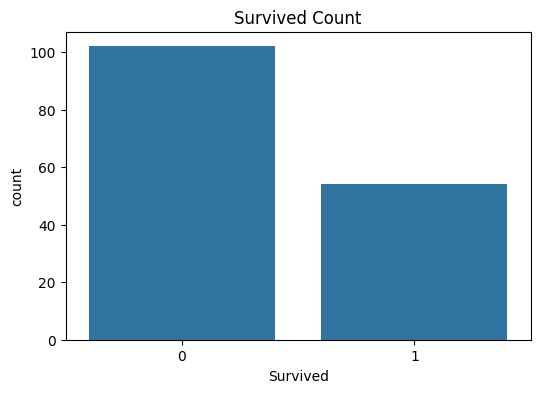

In [62]:
# 0 사망자, 1 생존자 그래프 생성 새끼야

# 그래프의 크기설정
plt.figure(figsize=(6,4))

# 카운트플롯 생성
# 역할: df["Survived"] 컬럼을 가져와 값을 분류한다 (0, 1)
# 값이 몇번 등장한지 센뒤 그 개수를 막대 그래프로 표현한다
# x축: Survived 컬럼 값 (0, 1)
# y축: 각 값의 개수
sns.countplot(x="Survived", data=df)

# 그래프 제목 설정
plt.title("Survived Count")

# 그래프 출력
plt.show()

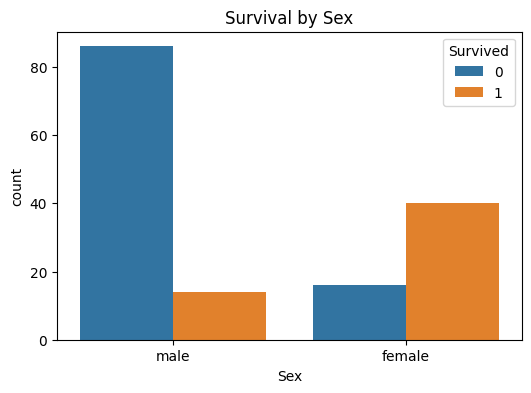

In [63]:
# 성별에 따른 생존 새끼야

# 그래프의 크기설정
plt.figure(figsize=(6,4))

# 카운트플롯 생성
# 성별 데이터와 생존 데이터를 함께 표현
# 성별로 나눈 뒤, 각 성별 내에서 생존자와 사망자의 수를 막대 그래프로 표현
sns.countplot(x="Sex", hue="Survived", data=df) # 색으로 그래프를 나눈다는 의미: 같은 x값 안에서 데이터를 색으로 구분할 기준

# 그래프 제목 설정
plt.title("Survival by Sex")

# 그래프 출력
plt.show()

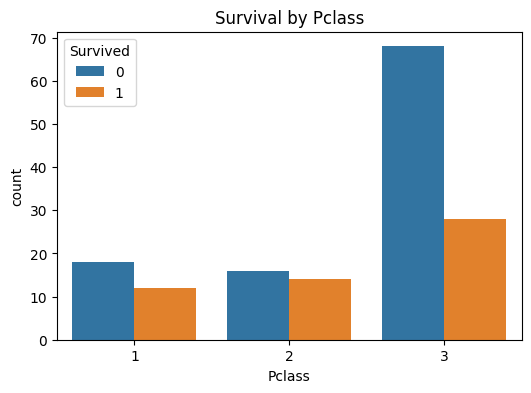

In [64]:
# 좌석 등급에 따른 생존 새끼야
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Pclass")
plt.show()

### 결과분석
- 성별/좌석 등급별로 생존 분포가 다르면 → “규칙이 있다”는 신호

- 이 신호를 기반으로 EDA에서 “가설”을 세울 수 있다.

## 6) 통계가 필요한 이유 — EDA와 모델 평가의 핵심
데이터 분석은 “그럴듯한 이야기”가 아니라, **숫자로 근거를 확인하고 판단**하는 일이기 때문에 통계는 필수

통계는 크게 두 곳에서 바로 쓰입니다.

- (A) EDA 관점:
    - “여성이 더 생존했을까?” 같은 질문을 비율/평균/분포/그룹 비교로 확인합니다.
- (B) 모델 성능 평가 관점:
    - 모델이 잘 학습했는지 정확도/정밀도/재현율 같은 지표로 측정합니다.

In [65]:
# 생존률 = 0/1 평균

df["Survived"].mean()

np.float64(0.34615384615384615)

In [66]:
# 그룹별 생존률(비율 비교)
df.groupby("Sex")["Survived"].mean()

Sex
female    0.714286
male      0.140000
Name: Survived, dtype: float64

In [67]:
df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.400000
2    0.466667
3    0.291667
Name: Survived, dtype: float64

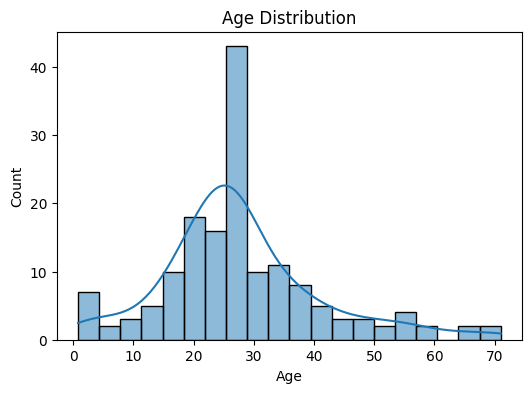

In [ ]:
plt.figure(figsize=(6,4))

# 히스토그램 
# 연속형 수치 데이터의 분포 구간별로 나누어 시각화한 그래프
# 연속형 데이터를 구간(bin)으로 나눈다: 최소 나이 ~ 최대 나이 범위를 20개의 구간(bin) 으로 나눈다
# 각 구간에 데이터가 몇 개 있는지 센다: 각 구간마다 해당 범위에 속하는 데이터 개수를 센다
# 막대(bar)로 시각화한다: x축: 나이 구간, y축: 해당 구간에 속한 사람 수, 막대 높이 = 빈도(count)
# kde=True는 Kernel Density Estimation (커널 밀도 추정): 히스토그램을 부드러운 곡선으로 근사한 확률 분포
sns.histplot(df["Age"], bins=20, kde=True) 
plt.title("Age Distribution")
plt.show()

#### 결과 해석
- Survived는 0/1이므로 평균이 곧 생존률입니다.
    - 예: 0.38이면 “전체 생존률 약 38%”
- 그룹별 평균 비교는 “성별/등급이 영향이 있는지”를 가장 쉽게 보여줍니다.
- 분포(히스토그램)는 “어느 구간에 데이터가 몰려 있는지”를 보여주며
전처리(이상치/결측치) 판단에도 도움됩니다.







통계는 EDA에서 “근거를 만드는 도구”이고, 모델 평가에서 “성능을 재는 자”입니다.

## 7) EDA 맛보기 — 가설 세우고 숫자로 확인
EDA는 모델 전에 “데이터가 어떤 특징을 갖는지” 이해하는 단계입니다. 좋은 가설은 좋은 피처 선택으로 이어집니다.

### 7-1) 가설 설립

- 여성 생존률이 더 높다
- 1등석 생존률이 더 높다
- 어린이는 생존률이 높을 수 있다


In [69]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 12, 18, 35, 60, 100],
                        labels=["Child","Teen","Young","Adult","Senior"])
df.groupby("AgeGroup")["Survived"].mean()

C:\Users\joon5\AppData\Local\Temp\ipykernel_31804\1279691856.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("AgeGroup")["Survived"].mean()


AgeGroup
Child     0.384615
Teen      0.357143
Young     0.387755
Adult     0.222222
Senior    0.000000
Name: Survived, dtype: float64

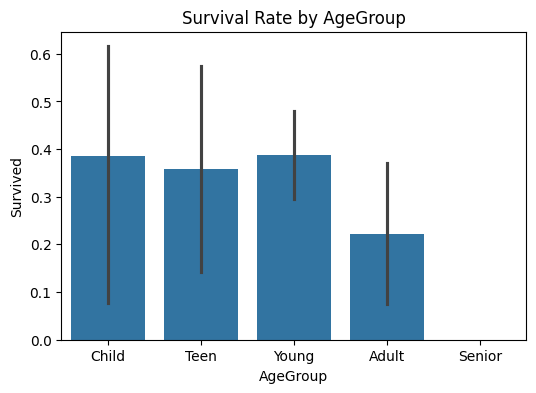

In [70]:
# 간단 시각화
plt.figure(figsize=(6,4))
sns.barplot(x="AgeGroup", y="Survived", data=df)
plt.title("Survival Rate by AgeGroup")
plt.show()

### 7-2) 가설 해설
- EDA는 “감”이 아니라 “가설→숫자 확인”의 반복입니다.
- 이런 결과를 보고 “이 변수는 예측에 도움 될 것 같다”를 판단합니다.

## 8) 머신러닝 분류 훈련 — 가장 간단한 베이스라인 모델
EDA로 “그럴 듯한 변수”를 봤다면, 이제 모델이 실제로 그 규칙을 학습해서 **정확히 맞추는지** 확인해야 합니다.


In [71]:
# pip install scikit-learn

In [73]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=["Survived"])
y = df_encoded["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [74]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


#### 결과해석
- train은 “공부용”, test는 “실전 시험용”
- test 성능이 중요합니다(외운 문제 말고 처음 보는 문제를 잘 맞추는지)

## 9) 모델의 성능 평가
모델이 좋아졌는지, 나빠졌는지 판단하려면 통계 지표가 필요합니다(감으로 판단하면 안 됨).

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nReport:\n", classification_report(y_test, pred))

Accuracy: 0.84375
Confusion Matrix:
 [[19  2]
 [ 3  8]]

Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.80      0.73      0.76        11

    accuracy                           0.84        32
   macro avg       0.83      0.82      0.82        32
weighted avg       0.84      0.84      0.84        32



#### 결과 해석
- Accuracy(정확도): 전체 중 맞춘 비율(초급에게 가장 직관적)
- Confusion Matrix: 생존(1)을 생존이라 맞춘 건지, 생존을 사망이라 틀린 건지 등 “오답 유형” 확인
- 정밀도/재현율/F1:
    - “1(생존)을 얼마나 잘 잡는지” 같은 목적이 있을 때 중요
    - (현업에서는 정확도만으로 판단하면 위험한 경우가 많음)


## 10) 과거 데이터를 통해 미래 예측하기 — 새 승객 예측
분석의 최종 목적은 “미래 판단”입니다. 새로운 승객이 들어왔을 때 모델이 생존 여부/확률을 예측하도록 해봅니다.

In [76]:
import pandas as pd

new_passenger = {
    "Pclass": 3,
    "Age": 22,
    "SibSp": 1,
    "Parch": 0,
    "Fare": 7.25,
    "Sex_male": 1,        # 남성
    "Embarked_Q": 0,
    "Embarked_S": 1       # S라고 가정
}

new_df = pd.DataFrame([new_passenger])[X.columns]  # 컬럼 순서 맞추기

pred_label = model.predict(new_df)[0]
pred_proba = model.predict_proba(new_df)[0, 1]

pred_label, pred_proba

(np.int64(0), np.float64(0.12175888555372133))

#### 결과해석
- pred_label: 최종 예측(0=사망, 1=생존)
- pred_proba: 생존 확률 (예: 0.63 → “생존 가능성 63%”)
- 실제 현업에서는 0/1보다 “확률”이 더 유용한 경우가 많습니다.